## Project 3 - Ensemble Techniques
Data Description: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### Domain: Banking

Context: Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.

### Attribute Information

age: age at the time of call. <br>
job: type of job. <br>
marital: marital status. <br>
education: education background at the time of call. <br>
default: has credit in default? <br>
balance: average yearly balance, in euros (numeric). <br>
housing: has housing loan? <br>
loan: has personal loan? <br>
contact: contact communication type. <br>
day: last contact day of the month (1 -31). <br>
month: last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec'). <br>
duration: last contact duration, in seconds (numeric). <br>
campaign: number of contacts performed during this campaign and for this client (includes last contact). <br>
pdays: number of days that passed by after the client was last contacted from a previous campaign. <br>
previous: number of contacts performed before this campaign and for this client. <br>
poutcome: outcome of the previous marketing campaign. <br>
target: has the client subscribed a term deposit? ('yes', 'no'). <br><br>
### Learning Outcomes

Exploratory Data Analysis. <br>
Preparing the data to train a model.<br>
Training and making predictions using an Ensemble Model.<br>
Tuning an Ensemble model. <br><br>

### Prepared by: 
  **Plinio Monteiro**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Sklearn modeling libraries
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# sklearn specific to ensemble techniques
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

import statsmodels.api as sm

from yellowbrick.classifier import ClassificationReport, ROCAUC

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image

from os import system

In C:\Users\PMONTEIR\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\PMONTEIR\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\PMONTEIR\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\PMONTEIR\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\PMONTEIR\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

#### Reading the Data and printing the first 5 rows

In [2]:
#Load/import data
df_Bank = pd.read_csv('bank-full.csv')

In [3]:
df_Bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

#### Get detail info on columns and data type

In [4]:
df_Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Observation: 
1. Data set has 45,211 rows with 17 columns and no missing values.
2. We can see that all the entries in data are non-null. Means no missing values.
3. All data-types are either int64 or object.</br>
4. Columns with data-types as object need to be converted into suitable data-type before it is feeded into the model.

### Exploratory Data Analysis

#### Target Variable Analysis

In [5]:
display(df_Bank['Target'].value_counts(), df_Bank['Target'].value_counts(normalize = True)*100)

no     39922
yes     5289
Name: Target, dtype: int64

no     88.30152
yes    11.69848
Name: Target, dtype: float64

#### Target Variable - only 5289 (11.69%) of the customers subscribed to the term deposit.

#### Let's get description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, skewness) 

In [6]:
### Let's look every category independent variables and determine the distinct values

columns = df_Bank.loc[:, df_Bank.dtypes == 'object'].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{df_Bank[cols].unique()}\n')
    
    

Unique values for job is 
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values for marital is 
['married' 'single' 'divorced']

Unique values for education is 
['tertiary' 'secondary' 'unknown' 'primary']

Unique values for default is 
['no' 'yes']

Unique values for housing is 
['yes' 'no']

Unique values for loan is 
['no' 'yes']

Unique values for contact is 
['unknown' 'cellular' 'telephone']

Unique values for month is 
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values for poutcome is 
['unknown' 'failure' 'other' 'success']

Unique values for Target is 
['no' 'yes']



In [7]:
df_Bank.describe(include = 'all').T

count unique          top   freq      mean      std   min  25%  \
age        45211    NaN          NaN    NaN   40.9362  10.6188    18   33   
job        45211     12  blue-collar   9732       NaN      NaN   NaN  NaN   
marital    45211      3      married  27214       NaN      NaN   NaN  NaN   
education  45211      4    secondary  23202       NaN      NaN   NaN  NaN   
default    45211      2           no  44396       NaN      NaN   NaN  NaN   
balance    45211    NaN          NaN    NaN   1362.27  3044.77 -8019   72   
housing    45211      2          yes  25130       NaN      NaN   NaN  NaN   
loan       45211      2           no  37967       NaN      NaN   NaN  NaN   
contact    45211      3     cellular  29285       NaN      NaN   NaN  NaN   
day        45211    NaN          NaN    NaN   15.8064  8.32248     1    8   
month      45211     12          may  13766       NaN      NaN   NaN  NaN   
duration   45211    NaN          NaN    NaN   258.163  257.528     0  103   
campaign   45211    NaN          NaN    NaN   2.76384  3.09802     1    1   
pdays      45211    NaN          NaN    NaN   40.1978  100.129    -1   -1   
previous   45211    NaN          NaN    NaN  0.580323  2.30344     0    0   
poutcome   45211      4      unknown  36959       NaN      NaN   NaN  NaN   
Target     45211      2           no  39922       NaN      NaN   NaN  NaN   

           50%   75%     max  
age         39    48      95  
job        NaN   NaN     NaN  
marital    NaN   NaN     NaN  
education  NaN   NaN     NaN  
default    NaN   NaN     NaN  
balance    448  1428  102127  
housing    NaN   NaN     NaN  
loan       NaN   NaN     NaN  
contact    NaN   NaN     NaN  
day         16    21      31  
month      NaN   NaN     NaN  
duration   180   319    4918  
campaign     2     3      63  
pdays       -1    -1     871  
previous     0     0     275  
poutcome   NaN   NaN     NaN  
Target     NaN   NaN     NaN

#### Let's determine the degree of data Skewness.

In [8]:
from scipy import stats


Skewness = pd.DataFrame({'Skewness' : [stats.skew(df_Bank['age']),stats.skew(df_Bank['balance']),
                                       stats.skew(df_Bank['duration']),
                                       stats.skew(df_Bank['campaign']),stats.skew(df_Bank['pdays']),
                                       stats.skew(df_Bank['previous'])]}, 
                        index=['age', 'balance', 'duration', 'campaign', 
                               'pdays', 'previous'])


Skewness

Skewness
age        0.684795
balance    8.360031
duration   3.144214
campaign   4.898488
pdays      2.615629
previous  41.845066

### Data insight
#### Categorical
**job** -  job type blue-collar is the most frequently occurring in the data.<br>
**marital** -  Nominal variable. Majority of customers are married.<br>
**education** - Most of the customers have secondary level education.<br>
**default** - Binary. Most of the customers don't have credit in default.<br>
**housing** -  Binary. Most of the customers have housing loan.<br>
**loan** - Binary. Most of the customers don't have personal loan.<br>
**contact** - Nominal. Most frequently used communication mode is cellular.<br>
**day** -  Includes last day of contact of the month.<br>
**month** - Includes last contact month of the year.<br>
**poutcome** - Includes outcome of the previous marketing campaign. Most occuring value being 'unknown'.<br>
### Numerical 
**age** - Continuous, ratio (has true zero, technically). Min age in the dataset being 18 and max being 95.<br>
**balance** - Range of average yearly balance is very wide from -8019 euros to 102127 euros.<br>
**duration** - Includes last contact duration in seconds. Min value being 0 and max value being 4918.<br>
**campaign** - Min number of contacts performed during this campaign being 1 and is also represents about 25% of the value and max being 63.<br>
**pdays** - Min number of days that passed by after the client was last contacted from a previous campaign being -1 (may need to be validated) and max days being 63.<br>
**previous** - Min number of contacts performed before this campaign is 0 and max being 275.<br>


### Descriptive Statistics

**age** -  Range of 25th to 75th Percentile is between 33 to 48. Since mean is slightly greater than median, we can say that age is right (positively) skewed.<br>
**balance** - Range of 25th to 75th Percentile is between 72 to 1428. Since mean is greater than median, we can say that balance is skewed towards right (positively).<br>
**duration** -  Range of 25th to 75th Percentile is between 103 to 319. Since mean is greater than median, we can say that duration is right (positively) skewed.<br>
**campaign** -  Range of 25th to 75th Percentile is between 1 to 3. Since mean is greater than median, we can say that campaign is right (positively) skewed.<br>
**pdays** -  75% of data values are around -1 which is a dummy value. It needs further check without considering the -1 value.<br>
**previous** - 75% of data values are around 0 which is a dummy value, maybe cases where client wasn't contacted. It needs further checks.<br>

#### Let's replace categorical values with numbers.

In [9]:
# Let's replace Education, Target, default, housing, loan and month with numerical. 

replace_values = {'education': {'unknown': -1, 'primary': 1, 'secondary': 2, 'tertiary': 3}, 'Target': {'no': 0, 'yes': 1},
                  'default': {'no': 0, 'yes': 1}, 'housing': {'no': 0, 'yes': 1}, 'loan': {'no': 0, 'yes': 1},
                  'contact': {'unknown': -1, 'cellular': 1, 'telephone': 2},
                  'month': {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
                            'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}}

df_Bank = df_Bank.replace(replace_values)

In [13]:
df_Bank.head()

age           job  marital  education  default  balance  housing  loan  \
0   58    management  married          3        0     2143        1     0   
1   44    technician   single          2        0       29        1     0   
2   33  entrepreneur  married          2        0        2        1     1   
3   47   blue-collar  married         -1        0     1506        1     0   
4   33       unknown   single         -1        0        1        0     0   

   contact  day  month  duration  campaign  pdays  previous poutcome  Target  
0       -1    5      5       261         1     -1         0  unknown       0  
1       -1    5      5       151         1     -1         0  unknown       0  
2       -1    5      5        76         1     -1         0  unknown       0  
3       -1    5      5        92         1     -1         0  unknown       0  
4       -1    5      5       198         1     -1         0  unknown       0

#### Function to Countplot Independent Variables and its relationship to the dependent variable Target.

In [10]:
def TargetCountPlot (df, col1, col2):
    fig = plt.figure(figsize = (15, 5))
    ax = fig.add_subplot(121)
    sns.countplot(x = col1, data = df,  palette = ['tab:blue', 'tab:cyan'], ax = ax, orient = 'v',
                  hue = 'Target').set_title(col1.capitalize() +' count plot by Target', 
                                                                      fontsize = 13)
    plt.legend(labels = ['Target Not Subcribed', 'Target Subcribed'])
    plt.xticks(rotation = 90)
    
    ax = fig.add_subplot(122)
    sns.countplot(x = col2, data = df, palette = ['tab:blue', 'tab:cyan'], ax = ax, orient = 'v', 
                  hue = 'Target').set_title(col2.capitalize() +' count plot by Target', 
                                                                      fontsize = 13)
    plt.legend(labels = ['Target Not Subcribed', 'Target Subcribed'])
    plt.xticks(rotation = 90)
    return plt.show()

In [11]:
def DistPlotBox (df, col1, title1, title2):
    
    fig = plt.figure(figsize = (15, 5))
    
# subplot 1
    plt.subplot(1, 2, 1)
    plt.title(title1)
    sns.distplot(df[df["Target"] == 0][col1], label='Target=0',  color='red')
    sns.distplot(df[df["Target"] == 1][col1], label='Target=1',  color='orange')
    #sns.displot(data=df, x=col1, hue='Target', kind='kde', fill=True, color='green')
    plt.legend(labels = ['Target Not Subcribed', 'Target Subcribed'])    
     
    
    plt.subplot(1, 2, 2)
    plt.title(title2)
    sns.boxplot(df[col1], orient = 'v', color = 'orange')
    
#    plt.subplot(1, 2, 3)
    
#    sns.stripplot(data=df_Bank, x=col1, y='Target', jitter=True);
    
    
    return plt.show()

In [12]:
#### Function to calculate outliers and IQR

def CalcOutliers (df, col1, colname):
    
   Q3 = df[col1].quantile(0.75)
   Q1 = df[col1].quantile(0.25)
   IQR = Q3 - Q1

   print('')
   print('================================ ', colname, ' ==========================================')
   print("Outlier (below and above Whiskers): (Q1 - 1.5 * IQR) = ",Q1 - 1.5 * IQR, "(Q3 + 1.5 * IQR) = ", Q3 + 1.5 * IQR)
   
   print()
   display(df.loc[(df[col1] < (Q1 - 1.5 * IQR)) | (df[col1] > (Q3 + 1.5 * IQR))].head())

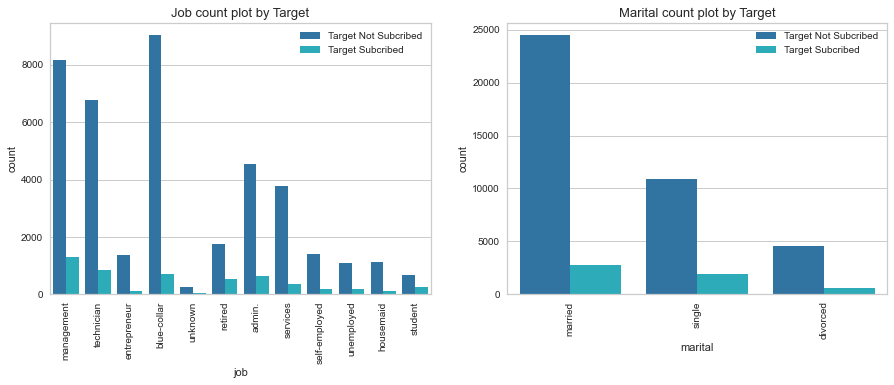

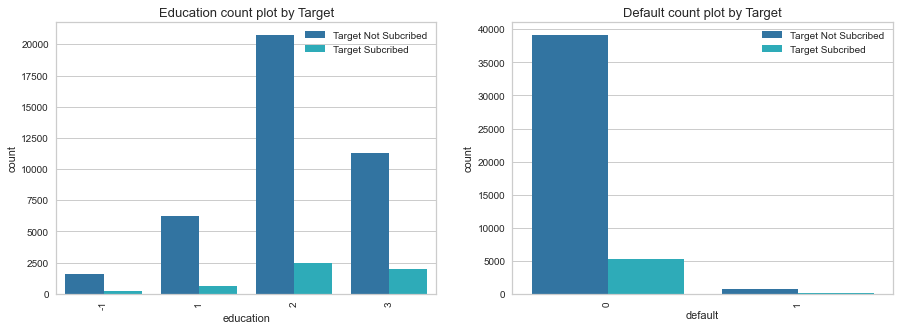

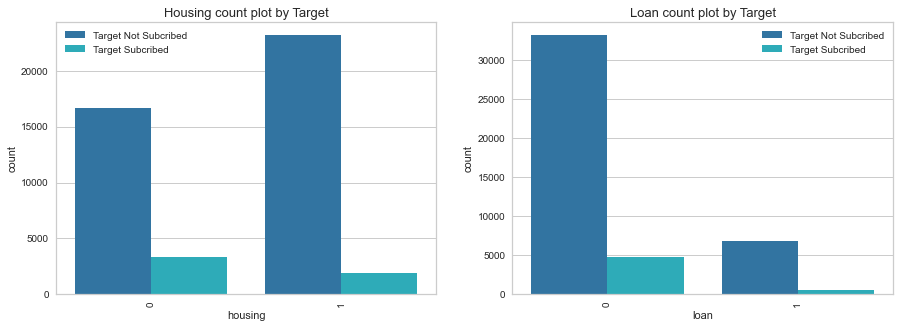

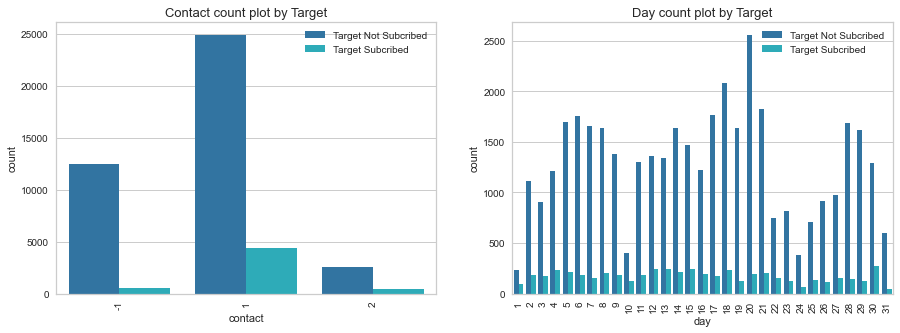

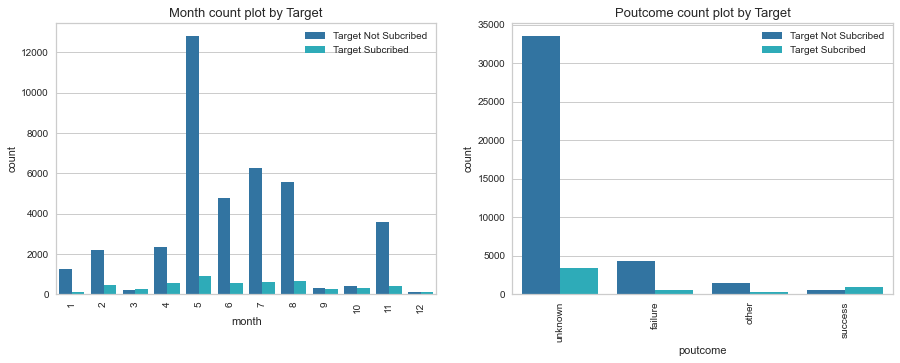

In [13]:
##########################################################################################
# Invoke created Functions to plot relationship to dependent variable Target      ########
##########################################################################################
TargetCountPlot (df_Bank, 'job', 'marital')
TargetCountPlot (df_Bank, 'education', 'default')

TargetCountPlot (df_Bank, 'housing', 'loan')
TargetCountPlot (df_Bank, 'contact', 'day')
TargetCountPlot (df_Bank, 'month', 'poutcome')


#### Insights: 
Management have a subscription rate of ~25 percent followed by technician.<br>
Married and single clients are more likely to subscribe then divorced clients. <br>
Customers with education of secondary followed by tertiary are more likely to subscribe to term deposits.<br>
Most of the customers don't have credit in default and their subscription rate is higher then people with default.<br>
Cellular communication type have higher subscription rate.<br>
Most of the subscription were made in May and August.<br>

In [14]:
df_Bank

age           job   marital  education  default  balance  housing  \
0       58    management   married          3        0     2143        1   
1       44    technician    single          2        0       29        1   
2       33  entrepreneur   married          2        0        2        1   
3       47   blue-collar   married         -1        0     1506        1   
4       33       unknown    single         -1        0        1        0   
...    ...           ...       ...        ...      ...      ...      ...   
45206   51    technician   married          3        0      825        0   
45207   71       retired  divorced          1        0     1729        0   
45208   72       retired   married          2        0     5715        0   
45209   57   blue-collar   married          2        0      668        0   
45210   37  entrepreneur   married          2        0     2971        0   

       loan  contact  day  month  duration  campaign  pdays  previous  \
0         0       -1    5      5       261         1     -1         0   
1         0       -1    5      5       151         1     -1         0   
2         1       -1    5      5        76         1     -1         0   
3         0       -1    5      5        92         1     -1         0   
4         0       -1    5      5       198         1     -1         0   
...     ...      ...  ...    ...       ...       ...    ...       ...   
45206     0        1   17     11       977         3     -1         0   
45207     0        1   17     11       456         2     -1         0   
45208     0        1   17     11      1127         5    184         3   
45209     0        2   17     11       508         4     -1         0   
45210     0        1   17     11       361         2    188        11   

      poutcome  Target  
0      unknown       0  
1      unknown       0  
2      unknown       0  
3      unknown       0  
4      unknown       0  
...        ...     ...  
45206  unknown       1  
45207  unknown       1  
45208  success       1  
45209  unknown       0  
45210    other       0  

[45211 rows x 17 columns]

### Let's replace the variables object data type with categorical data type.

In [15]:
for feature in df_Bank.columns:                             # Loop through all columns in the dataframe
    if df_Bank[feature].dtype == 'object':                  # Only apply for columns with categorical strings
        df_Bank[feature] = pd.Categorical(df_Bank[feature]) # Replace strings with an integer
df_Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  int64   
 4   default    45211 non-null  int64   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int64   
 7   loan       45211 non-null  int64   
 8   contact    45211 non-null  int64   
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int64   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  int64   
dtypes: category(3), int64(14)
memory usage: 5.0 MB


#### Let's find out the outliers (below and above the whiskers). Let's also get a snapshot of the outliers.

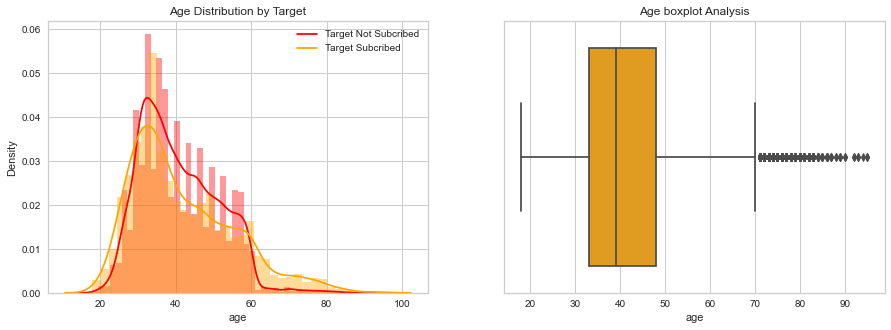


================================  Age  ==========================================
Outlier (below and above Whiskers): (Q1 - 1.5 * IQR) =  10.5 (Q3 + 1.5 * IQR) =  70.5



age      job   marital  education  default  balance  housing  loan  \
29158   83  retired   married          1        0      425        0     0   
29261   75  retired  divorced          1        0       46        0     0   
29263   75  retired   married          1        0     3324        0     0   
29322   83  retired   married          3        0     6236        0     0   
29865   75  retired  divorced          1        0     3881        1     0   

       contact  day  month  duration  campaign  pdays  previous poutcome  \
29158        2    2      2       912         1     -1         0  unknown   
29261        1    2      2       294         1     -1         0  unknown   
29263        1    2      2       149         1     -1         0  unknown   
29322        1    2      2       283         2     -1         0  unknown   
29865        1    4      2       136         3     -1         0  unknown   

       Target  
29158       0  
29261       0  
29263       0  
29322       0  
29865       1

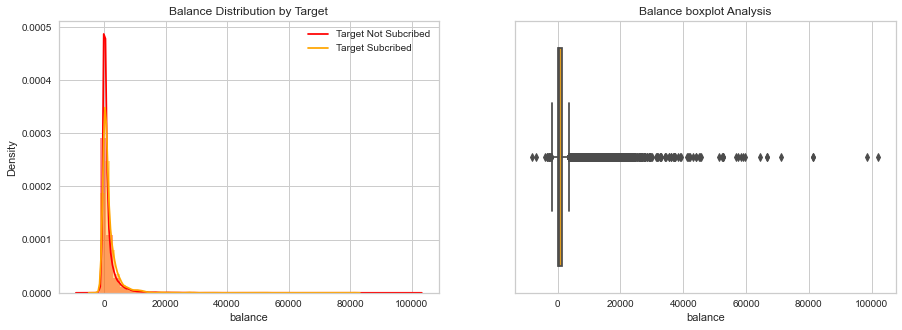


================================  Balance  ==========================================
Outlier (below and above Whiskers): (Q1 - 1.5 * IQR) =  -1962.0 (Q3 + 1.5 * IQR) =  3462.0



age          job   marital  education  default  balance  housing  loan  \
34    51   management   married          3        0    10635        1     0   
65    51   management   married          3        0     6530        1     0   
69    35  blue-collar    single          2        0    12223        1     1   
70    57  blue-collar   married          2        0     5935        1     1   
186   40     services  divorced         -1        0     4384        1     0   

     contact  day  month  duration  campaign  pdays  previous poutcome  Target  
34        -1    5      5       336         1     -1         0  unknown       0  
65        -1    5      5        91         1     -1         0  unknown       0  
69        -1    5      5       177         1     -1         0  unknown       0  
70        -1    5      5       258         1     -1         0  unknown       0  
186       -1    5      5       315         1     -1         0  unknown       0

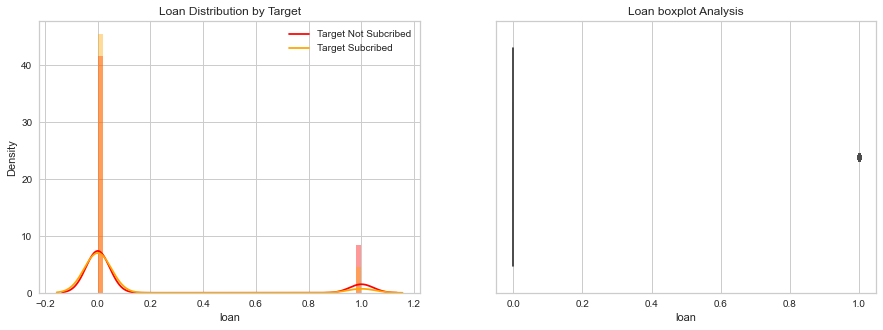


================================  Loan  ==========================================
Outlier (below and above Whiskers): (Q1 - 1.5 * IQR) =  0.0 (Q3 + 1.5 * IQR) =  0.0



age           job  marital  education  default  balance  housing  loan  \
2    33  entrepreneur  married          2        0        2        1     1   
6    28    management   single          3        0      447        1     1   
20   28   blue-collar  married          2        0      723        1     1   
22   32   blue-collar   single          1        0       23        1     1   
24   40       retired  married          1        0        0        1     1   

    contact  day  month  duration  campaign  pdays  previous poutcome  Target  
2        -1    5      5        76         1     -1         0  unknown       0  
6        -1    5      5       217         1     -1         0  unknown       0  
20       -1    5      5       262         1     -1         0  unknown       0  
22       -1    5      5       160         1     -1         0  unknown       0  
24       -1    5      5       181         1     -1         0  unknown       0

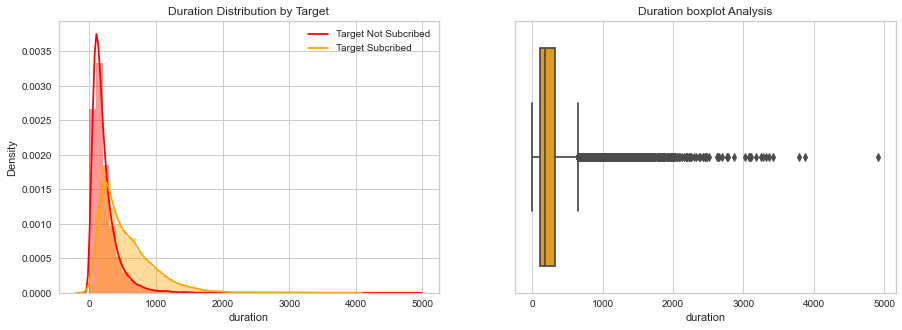


================================  Duration  ==========================================
Outlier (below and above Whiskers): (Q1 - 1.5 * IQR) =  -221.0 (Q3 + 1.5 * IQR) =  643.0



age         job   marital  education  default  balance  housing  loan  \
37   53  technician   married          2        0       -3        0     0   
43   54     retired   married          2        0      529        1     0   
53   42      admin.    single          2        0      -76        1     0   
59   46    services   married          1        0      179        1     0   
61   53  technician  divorced          2        0      989        1     0   

    contact  day  month  duration  campaign  pdays  previous poutcome  Target  
37       -1    5      5      1666         1     -1         0  unknown       0  
43       -1    5      5      1492         1     -1         0  unknown       0  
53       -1    5      5       787         1     -1         0  unknown       0  
59       -1    5      5      1778         1     -1         0  unknown       0  
61       -1    5      5       812         1     -1         0  unknown       0

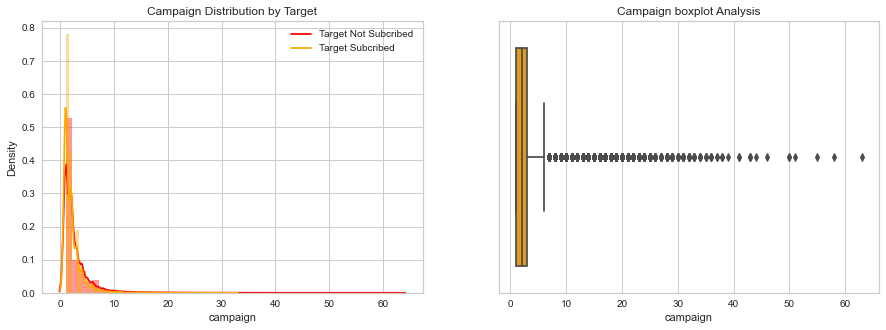


================================  Campaign  ==========================================
Outlier (below and above Whiskers): (Q1 - 1.5 * IQR) =  -2.0 (Q3 + 1.5 * IQR) =  6.0



age         job  marital  education  default  balance  housing  loan  \
758    59    services  married          2        0      307        1     1   
780    30      admin.  married          2        0        4        0     0   
906    27    services   single          2        0        0        1     0   
1103   52  technician  married         -1        0      133        1     0   
1105   43      admin.  married          3        0     1924        1     0   

      contact  day  month  duration  campaign  pdays  previous poutcome  \
758        -1    6      5       250         7     -1         0  unknown   
780        -1    7      5       172         8     -1         0  unknown   
906        -1    7      5       388         7     -1         0  unknown   
1103       -1    7      5       253         8     -1         0  unknown   
1105       -1    7      5       244         7     -1         0  unknown   

      Target  
758        0  
780        0  
906        0  
1103       0  
1105       0

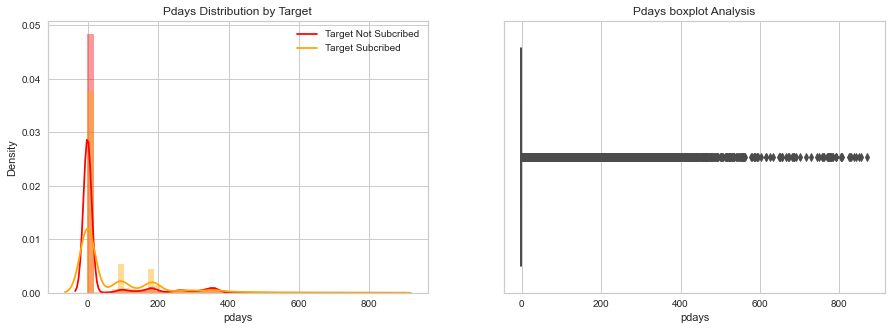


================================  Pdays  ==========================================
Outlier (below and above Whiskers): (Q1 - 1.5 * IQR) =  -1.0 (Q3 + 1.5 * IQR) =  -1.0



age         job  marital  education  default  balance  housing  loan  \
24060   33      admin.  married          3        0      882        0     0   
24062   42      admin.   single          2        0     -247        1     1   
24064   33    services  married          2        0     3444        1     0   
24072   36  management  married          3        0     2415        1     0   
24077   36  management  married          3        0        0        1     0   

       contact  day  month  duration  campaign  pdays  previous poutcome  \
24060        2   21     10        39         1    151         3  failure   
24062        2   21     10       519         1    166         1    other   
24064        2   21     10       144         1     91         4  failure   
24072        2   22     10        73         1     86         4    other   
24077        2   23     10       140         1    143         3  failure   

       Target  
24060       0  
24062       1  
24064       1  
24072       0  
24077       1

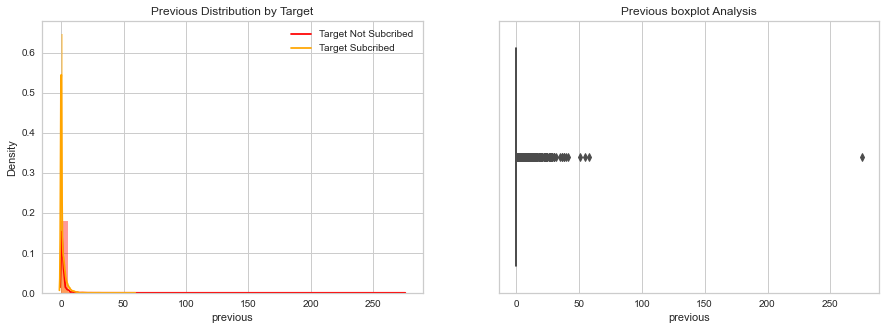


================================  Previous  ==========================================
Outlier (below and above Whiskers): (Q1 - 1.5 * IQR) =  0.0 (Q3 + 1.5 * IQR) =  0.0



age         job  marital  education  default  balance  housing  loan  \
24060   33      admin.  married          3        0      882        0     0   
24062   42      admin.   single          2        0     -247        1     1   
24064   33    services  married          2        0     3444        1     0   
24072   36  management  married          3        0     2415        1     0   
24077   36  management  married          3        0        0        1     0   

       contact  day  month  duration  campaign  pdays  previous poutcome  \
24060        2   21     10        39         1    151         3  failure   
24062        2   21     10       519         1    166         1    other   
24064        2   21     10       144         1     91         4  failure   
24072        2   22     10        73         1     86         4    other   
24077        2   23     10       140         1    143         3  failure   

       Target  
24060       0  
24062       1  
24064       1  
24072       0  
24077       1

In [16]:
DistPlotBox (df_Bank, 'age', 'Age Distribution by Target', 'Age boxplot Analysis')
CalcOutliers (df_Bank, 'age', 'Age')

DistPlotBox (df_Bank, 'balance', 'Balance Distribution by Target', 'Balance boxplot Analysis')
CalcOutliers (df_Bank, 'balance', 'Balance')

DistPlotBox (df_Bank, 'loan', 'Loan Distribution by Target', 'Loan boxplot Analysis')
CalcOutliers (df_Bank, 'loan', 'Loan')

DistPlotBox (df_Bank, 'duration', 'Duration Distribution by Target', 'Duration boxplot Analysis')
CalcOutliers (df_Bank, 'duration', 'Duration')

DistPlotBox (df_Bank, 'campaign', 'Campaign Distribution by Target', 'Campaign boxplot Analysis')
CalcOutliers (df_Bank, 'campaign', 'Campaign')

DistPlotBox (df_Bank, 'pdays', 'Pdays Distribution by Target', 'Pdays boxplot Analysis')
CalcOutliers (df_Bank, 'pdays', 'Pdays')

DistPlotBox (df_Bank, 'previous', 'Previous Distribution by Target', 'Previous boxplot Analysis')
CalcOutliers (df_Bank, 'previous', 'Previous')

### Outliers Insights 1:
- Based on the findings above, it appears that there is a presence of Outliers in the numerical measurement.
- However, replacing or removing Outliers in Banking accounts is very risky.
- For example, Age = 10 is spotted as an outlier. Is this really an outlier from the Bank perspective? Or an actual child account created by their parents?
- Same thing for Balances. Is a negative balance an outlier? No. People can carry negative balance.
- There is no obvious reason to manipulate what has been spotted as outliers in this analysis. 


### Outliers Insights 2:
- Most importantly, Decision Trees is not impacted by outliers as, for example, a Logistic Regression.
- This is because decision trees divide items by lines, so it does not makes much difference how far a point is from lines.
- Hence, most likely outliers will have a negligible impact because the nodes are determined based on the sample proportions in each split region (and not on their absolute values).

In [24]:
# Replacing outliers with lower 1th Percentile and upper 99th Percentile.
# We will first replace the Outliers with null values.

# Let's create a new dataframe. 
# I am using deep = True in order to create a copy that has its own data and index. 
# So any modifications to the new DataFrame will not modify the original DataFrame.

# df_Bank2 = df_Bank.copy(deep = True) 

# Columns to have the Outliers Replaced
# columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# for col in columns:
#    upper99 = np.percentile(df_Bank2[col].values, 99)
#    lower1  = np.percentile(df_Bank2[col].values, 1)
#    df_Bank2.loc[(df_Bank2[col] >= upper99), col] = np.nan
#    df_Bank2.loc[(df_Bank2[col] <= lower1),  col] = np.nan

#### we have the option to use Scikit-Learn One Hot-Encoder or Pandas Dummy to transform variables.

In [17]:
# Let's use pandas get dummies to convert contact, job, marital and putcome

OneHotCol = ['contact', 'job', 'marital', 'poutcome']

df_Bank = pd.get_dummies(df_Bank, columns = OneHotCol)

df_Bank.head()

age  education  default  balance  housing  loan  day  month  duration  \
0   58          3        0     2143        1     0    5      5       261   
1   44          2        0       29        1     0    5      5       151   
2   33          2        0        2        1     1    5      5        76   
3   47         -1        0     1506        1     0    5      5        92   
4   33         -1        0        1        0     0    5      5       198   

   campaign  ...  job_technician  job_unemployed  job_unknown  \
0         1  ...               0               0            0   
1         1  ...               1               0            0   
2         1  ...               0               0            0   
3         1  ...               0               0            0   
4         1  ...               0               0            1   

   marital_divorced  marital_married  marital_single  poutcome_failure  \
0                 0                1               0                 0   
1                 0                0               1                 0   
2                 0                1               0                 0   
3                 0                1               0                 0   
4                 0                0               1                 0   

   poutcome_other  poutcome_success  poutcome_unknown  
0               0                 0                 1  
1               0                 0                 1  
2               0                 0                 1  
3               0                 0                 1  
4               0                 0                 1  

[5 rows x 35 columns]

In [122]:
#sns.pairplot(df_Bank2, hue="Target", palette="husl")

In [18]:
#####################################################################################################
# Note that now all of the columns are numeric columns. This is fundamental for the model to perform
#####################################################################################################
df_Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   education          45211 non-null  int64
 2   default            45211 non-null  int64
 3   balance            45211 non-null  int64
 4   housing            45211 non-null  int64
 5   loan               45211 non-null  int64
 6   day                45211 non-null  int64
 7   month              45211 non-null  int64
 8   duration           45211 non-null  int64
 9   campaign           45211 non-null  int64
 10  pdays              45211 non-null  int64
 11  previous           45211 non-null  int64
 12  Target             45211 non-null  int64
 13  contact_-1         45211 non-null  uint8
 14  contact_1          45211 non-null  uint8
 15  contact_2          45211 non-null  uint8
 16  job_admin.         45211 non-null  uint8
 17  job_blue-col

In [19]:
df_Bank.describe(include = 'all').T

count         mean          std     min    25%    50%  \
age                45211.0    40.936210    10.618762    18.0   33.0   39.0   
education          45211.0     2.019442     0.902795    -1.0    2.0    2.0   
default            45211.0     0.018027     0.133049     0.0    0.0    0.0   
balance            45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0   
housing            45211.0     0.555838     0.496878     0.0    0.0    1.0   
loan               45211.0     0.160226     0.366820     0.0    0.0    0.0   
day                45211.0    15.806419     8.322476     1.0    8.0   16.0   
month              45211.0     6.144655     2.408034     1.0    5.0    6.0   
duration           45211.0   258.163080   257.527812     0.0  103.0  180.0   
campaign           45211.0     2.763841     3.098021     1.0    1.0    2.0   
pdays              45211.0    40.197828   100.128746    -1.0   -1.0   -1.0   
previous           45211.0     0.580323     2.303441     0.0    0.0    0.0   
Target             45211.0     0.116985     0.321406     0.0    0.0    0.0   
contact_-1         45211.0     0.287983     0.452828     0.0    0.0    0.0   
contact_1          45211.0     0.647741     0.477680     0.0    0.0    1.0   
contact_2          45211.0     0.064276     0.245247     0.0    0.0    0.0   
job_admin.         45211.0     0.114375     0.318269     0.0    0.0    0.0   
job_blue-collar    45211.0     0.215257     0.411005     0.0    0.0    0.0   
job_entrepreneur   45211.0     0.032890     0.178351     0.0    0.0    0.0   
job_housemaid      45211.0     0.027427     0.163326     0.0    0.0    0.0   
job_management     45211.0     0.209197     0.406740     0.0    0.0    0.0   
job_retired        45211.0     0.050076     0.218105     0.0    0.0    0.0   
job_self-employed  45211.0     0.034925     0.183592     0.0    0.0    0.0   
job_services       45211.0     0.091880     0.288860     0.0    0.0    0.0   
job_student        45211.0     0.020747     0.142538     0.0    0.0    0.0   
job_technician     45211.0     0.168034     0.373901     0.0    0.0    0.0   
job_unemployed     45211.0     0.028820     0.167303     0.0    0.0    0.0   
job_unknown        45211.0     0.006370     0.079559     0.0    0.0    0.0   
marital_divorced   45211.0     0.115171     0.319232     0.0    0.0    0.0   
marital_married    45211.0     0.601933     0.489505     0.0    0.0    1.0   
marital_single     45211.0     0.282896     0.450411     0.0    0.0    0.0   
poutcome_failure   45211.0     0.108403     0.310892     0.0    0.0    0.0   
poutcome_other     45211.0     0.040698     0.197592     0.0    0.0    0.0   
poutcome_success   45211.0     0.033421     0.179735     0.0    0.0    0.0   
poutcome_unknown   45211.0     0.817478     0.386278     0.0    1.0    1.0   

                      75%       max  
age                  48.0      95.0  
education             3.0       3.0  
default               0.0       1.0  
balance            1428.0  102127.0  
housing               1.0       1.0  
loan                  0.0       1.0  
day                  21.0      31.0  
month                 8.0      12.0  
duration            319.0    4918.0  
campaign              3.0      63.0  
pdays                -1.0     871.0  
previous              0.0     275.0  
Target                0.0       1.0  
contact_-1            1.0       1.0  
contact_1             1.0       1.0  
contact_2             0.0       1.0  
job_admin.            0.0       1.0  
job_blue-collar       0.0       1.0  
job_entrepreneur      0.0       1.0  
job_housemaid         0.0       1.0  
job_management        0.0       1.0  
job_retired           0.0       1.0  
job_self-employed     0.0       1.0  
job_services          0.0       1.0  
job_student           0.0       1.0  
job_technician        0.0       1.0  
job_unemployed        0.0       1.0  
job_unknown           0.0       1.0  
marital_divorced      0.0       1.0  
marital_married       1.0       1.0  
marital_single        1.0       1.

### Multivariate visualization

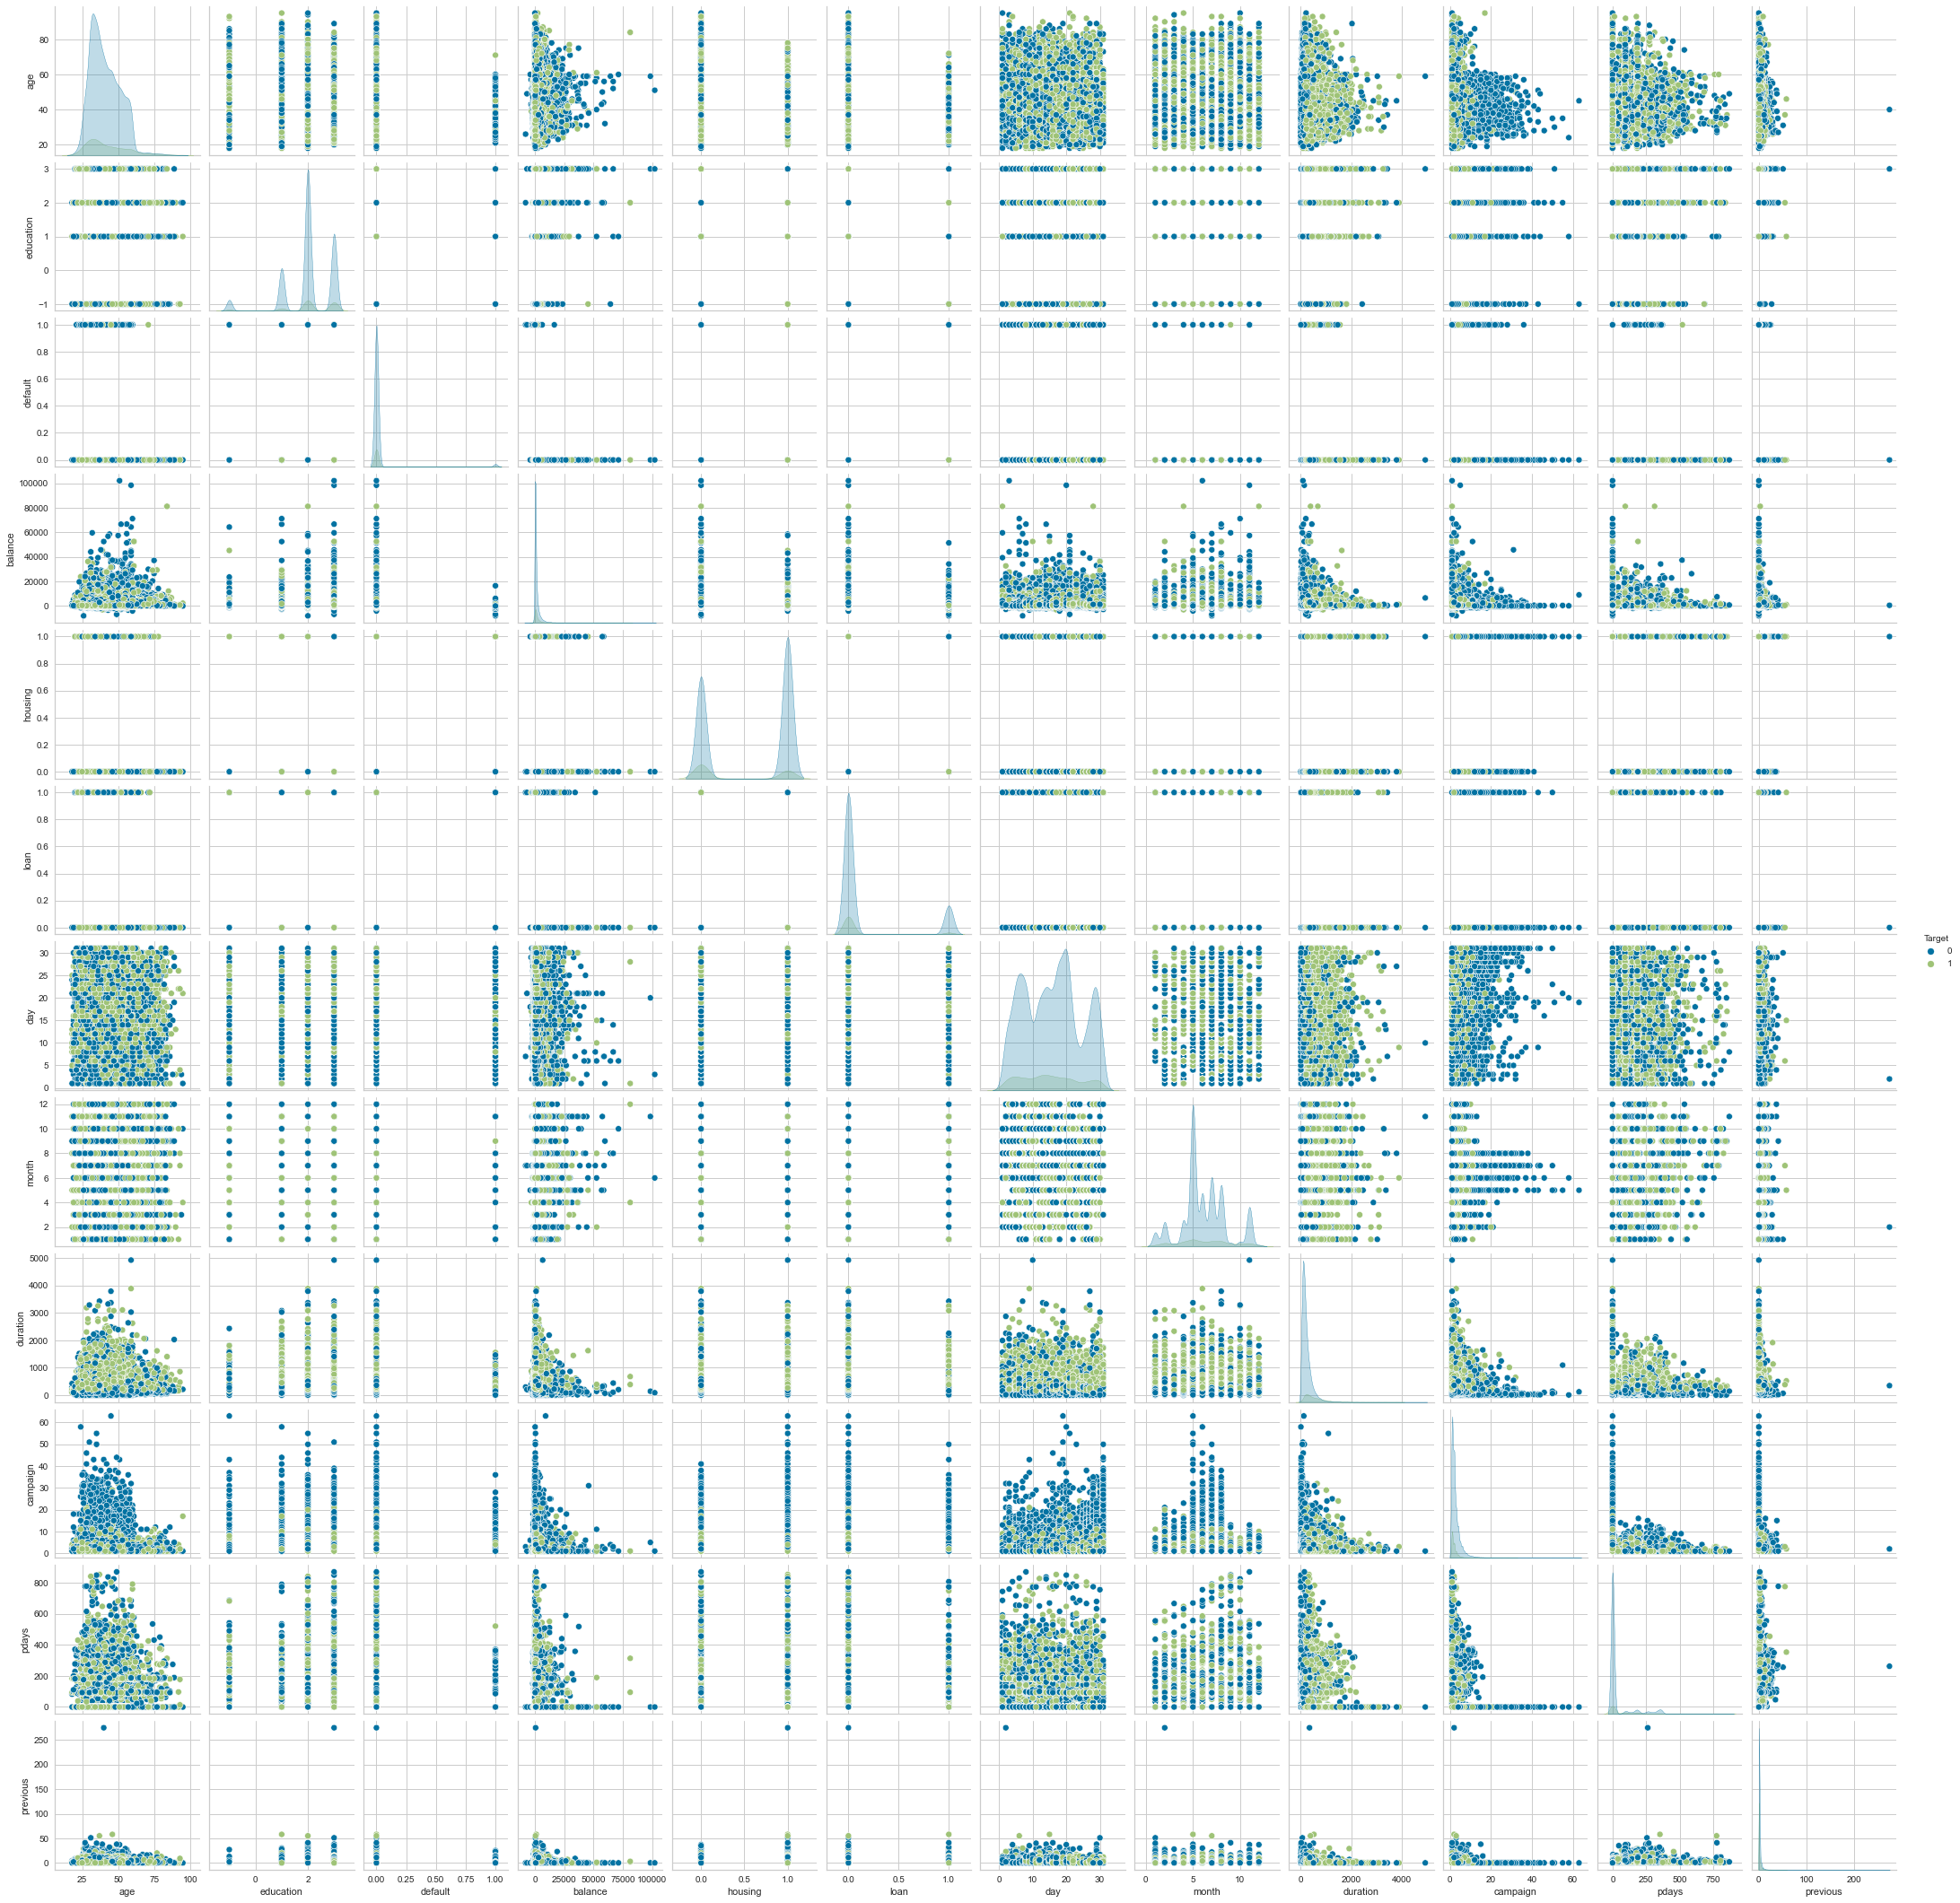

In [26]:
sns.pairplot(df_Bank[['age', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 
                           'duration', 'campaign', 'pdays', 'previous', 'Target']], hue = 'Target')

In [27]:
df_Bank.corr()

age  education   default   balance   housing  \
age                1.000000  -0.165066 -0.017879  0.097783 -0.185513   
education         -0.165066   1.000000 -0.007522  0.041163 -0.022908   
default           -0.017879  -0.007522  1.000000 -0.066745 -0.006025   
balance            0.097783   0.041163 -0.066745  1.000000 -0.068768   
housing           -0.185513  -0.022908 -0.006025 -0.068768  1.000000   
loan              -0.015655   0.014705  0.077234 -0.084350  0.041323   
day               -0.009120   0.018659  0.009424  0.004503 -0.027982   
month              0.092903   0.061910  0.014989  0.094605 -0.173887   
duration          -0.004648   0.002353 -0.010021  0.021560  0.005075   
campaign           0.004760  -0.001087  0.016822 -0.014578 -0.023599   
pdays             -0.023758   0.007635 -0.029979  0.003435  0.124178   
previous           0.001288   0.023633 -0.018329  0.016674  0.037076   
Target             0.025155   0.041634 -0.022419  0.052838 -0.139173   
contact_-1        -0.020132  -0.119689  0.019933 -0.037331  0.208409   
contact_1         -0.068375   0.150366 -0.010061  0.015880 -0.156071   
contact_2          0.170349  -0.071879 -0.017208  0.037999 -0.080822   
job_admin.        -0.055717  -0.019286 -0.010037 -0.026726  0.043046   
job_blue-collar   -0.044002  -0.307607  0.010341 -0.048757  0.177475   
job_entrepreneur   0.021792   0.033806  0.026281  0.009642  0.010600   
job_housemaid      0.086650  -0.091973 -0.000359  0.001661 -0.079380   
job_management    -0.023571   0.397387 -0.002655  0.067797 -0.063382   
job_retired        0.447378  -0.093239 -0.011290  0.046900 -0.156633   
job_self-employed -0.008093   0.074105  0.004107  0.017850 -0.027319   
job_services      -0.065780  -0.057147  0.000068 -0.038151  0.070435   
job_student       -0.197302  -0.056420 -0.016222  0.001233 -0.085066   
job_technician    -0.068632   0.061353 -0.003089 -0.016183 -0.012823   
job_unemployed     0.000412  -0.011764  0.006470  0.009023 -0.048229   
job_unknown        0.050200  -0.122750 -0.006669  0.010784 -0.075023   
marital_divorced   0.164674   0.008501  0.017777 -0.021732  0.001778   
marital_married    0.286257  -0.110970 -0.014460  0.025708  0.017681   
marital_single    -0.427817   0.114576  0.003115 -0.012537 -0.020475   
poutcome_failure  -0.004927   0.017551 -0.026389  0.011857  0.106795   
poutcome_other    -0.022967   0.008584 -0.014445  0.008466  0.039710   
poutcome_success   0.035526   0.029529 -0.023344  0.035240 -0.091360   
poutcome_unknown  -0.000816  -0.032257  0.039490 -0.030271 -0.063755   

                       loan       day     month  duration  campaign  ...  \
age               -0.015655 -0.009120  0.092903 -0.004648  0.004760  ...   
education          0.014705  0.018659  0.061910  0.002353 -0.001087  ...   
default            0.077234  0.009424  0.014989 -0.010021  0.016822  ...   
balance           -0.084350  0.004503  0.094605  0.021560 -0.014578  ...   
housing            0.041323 -0.027982 -0.173887  0.005075 -0.023599  ...   
loan               1.000000  0.011370  0.021638 -0.012412  0.009980  ...   
day                0.011370  1.000000  0.101989 -0.030206  0.162490  ...   
month              0.021638  0.101989  1.000000 -0.011866  0.054868  ...   
duration          -0.012412 -0.030206 -0.011866  1.000000 -0.084570  ...   
campaign           0.009980  0.162490  0.054868 -0.084570  1.000000  ...   
pdays             -0.022754 -0.093044 -0.108940 -0.001565 -0.088628  ...   
previous          -0.011043 -0.051710 -0.035600  0.001203 -0.032855  ...   
Target            -0.068185 -0.028348  0.018717  0.394521 -0.073172  ...   
contact_-1        -0.007211 -0.034103 -0.182490 -0.014379  0.004853  ...   
contact_1          0.013604  0.020186  0.153677  0.025543 -0.032271  ...   
contact_2         -0.013183  0.023652  0.037628 -0.023201  0.053895  ...   
job_admin.         0.030781 -0.010455 -0.034056 -0.015722 -0.021868  ...   
job_blue-collar    0.018291 -0.022898 -0.086619  0.009637  0.00

Text(0.5, 1.0, 'Correlation Matrix of Attributes')

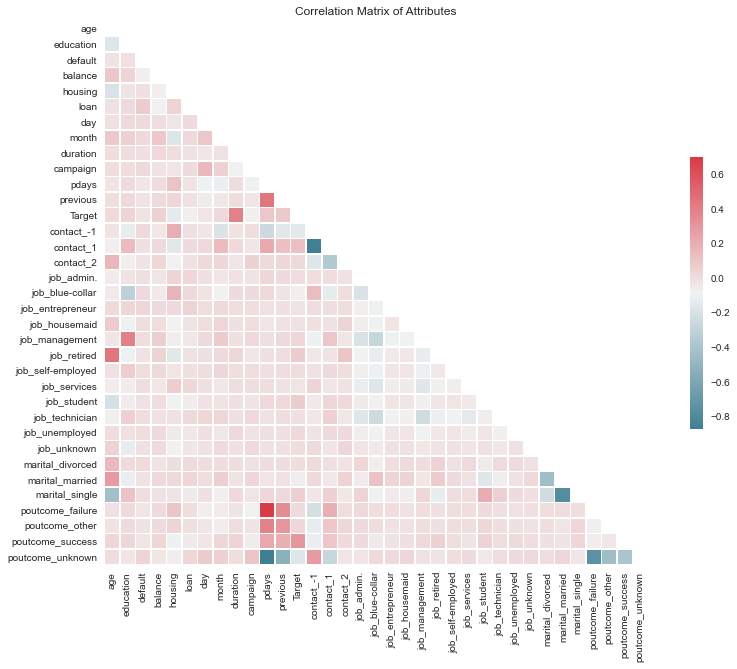

In [20]:
####################################################################################
# Let's get a correlation Matrix of all attributes.  
####################################################################################
correlation = df_Bank.corr()

mask = np.zeros_like(correlation, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (15, 10))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(correlation, mask = mask, cmap = cmap, square = True, linewidths = .5, cbar_kws = {"shrink": .5})
ax.set_title('Correlation Matrix of Attributes')

In [21]:
#####################################################################
# Select the correlations where coefficient of correlation is > 0.7
#####################################################################
sort = correlation.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.7) & (sort < 1)]

poutcome_unknown  pdays               0.869962
pdays             poutcome_unknown    0.869962
contact_1         contact_-1          0.862398
contact_-1        contact_1           0.862398
marital_single    marital_married     0.772357
marital_married   marital_single      0.772357
poutcome_failure  poutcome_unknown    0.737932
poutcome_unknown  poutcome_failure    0.737932
pdays             poutcome_failure    0.701052
poutcome_failure  pdays               0.701052
dtype: float64

In [22]:
#################################################################################
# Coefficient of Correlation between independent variables and Target variable.
################################################################################
Corrx = []
Independent = df_Bank.drop('Target', axis = 1).columns

for var in Independent:
    Corrx.append((df_Bank['Target'].corr(df_Bank[var])))

display(pd.DataFrame([Independent, Corrx], index = ['Variable', 'Coefficient']).T.\
        sort_values('Coefficient', ascending = False))

Variable  Coefficient
8            duration     0.394521
32   poutcome_success     0.306788
13          contact_1     0.135873
10              pdays     0.103621
11           previous    0.0932358
20        job_retired    0.0792453
23        job_student     0.076897
29     marital_single    0.0635258
3             balance    0.0528384
1           education    0.0416343
19     job_management    0.0329188
31     poutcome_other     0.031955
0                 age     0.025155
25     job_unemployed    0.0203899
7               month     0.018717
14          contact_2    0.0140425
30   poutcome_failure   0.00988545
15         job_admin.   0.00563747
27   marital_divorced   0.00277237
21  job_self-employed  0.000855031
26        job_unknown  0.000266748
24     job_technician  -0.00896982
18      job_housemaid   -0.0151949
17   job_entrepreneur   -0.0196623
2             default    -0.022419
22       job_services   -0.0278639
6                 day   -0.0283478
28    marital_married   -0.0602604
5                loan    -0.068185
16    job_blue-collar   -0.0720831
9            campaign    -0.073172
4             housing    -0.139173
12         contact_-1    -0.150935
33   poutcome_unknown    -0.167051

#### Insights:
- Dependent Variable 'Target' has a higher correlation with duration and poutcome_success.
- Likely Duration will be the tree root since it has the highest correlation with Target.

## Split Data

In [23]:
X = df_Bank.drop("Target" , axis=1)
y = df_Bank.pop("Target")

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=7)

## Build Decision Tree Model

In [25]:
########################################################################################
# Criterion gini will be usused in this model. Note that another option would be entropy
########################################################################################
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=7)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

## Scoring the Decision Tree

In [26]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8729725744618106


In [27]:
predictions = dTree.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8729725744618106


In [28]:
from sklearn.metrics import average_precision_score

per_class_precision = precision_score(predictions, y_test, average=None)
print('Per-class precision score:', per_class_precision)

average_precision = average_precision_score(y_test, predictions)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Per-class precision score: [0.92418953 0.47131682]
Average precision-recall score: 0.27


In [31]:
#print ("recall score", metrics.recall_score(y_test, predictions, average='macro'))
print ("recall score", metrics.recall_score(y_test, predictions, pos_label=1, average='binary'))

recall score 0.47131681877444587


#### Insights:
1. Training data is over fitting with a score of 1.0
2. Testing data is way lower than training data indicating that the model is over fitting on the training data.

## Visualizing the Decision Tree

In [32]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

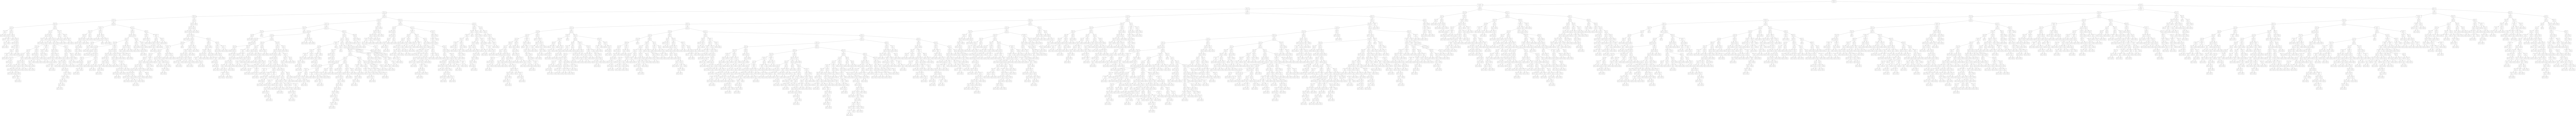

In [33]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

#### Decision Tree Graph is too large for rendenring

## Reducing over fitting (Regularization/Pruning)

In [34]:
################################################
# Let's reduce over fitting by reducing max_depth to 3
################################################
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=7)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.9003065061459222
0.9038631672073135


#### Insights: Note the accuracy of the model improved from .87 to .90. Note also how close test and train scores are. 

In [35]:

predictions = dTreeR.predict(X_test)
model_score = (accuracy_score(y_test, predictions))
print(model_score)

0.9038631672073135


In [39]:
print ("recall score", metrics.recall_score(y_test, predictions, pos_label=1, average='binary'))

recall score 0.318122555410691


### Insights: By reducing over fitting, model improved dramatically for both train and test data.

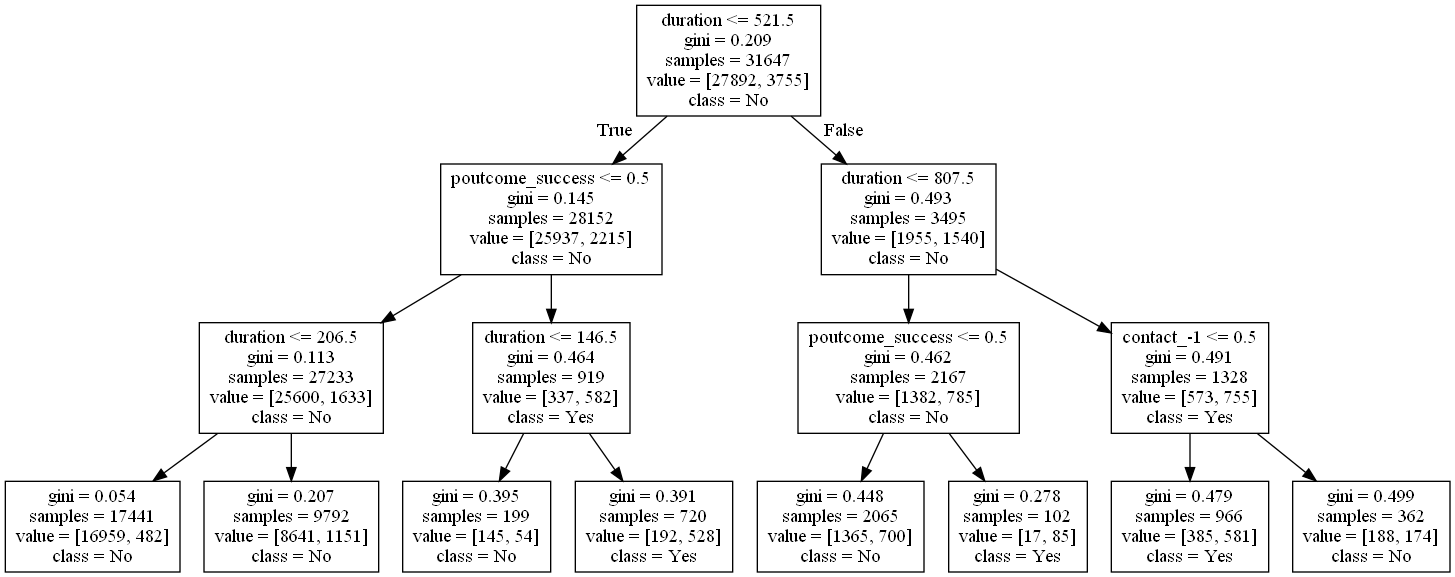

In [40]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))

#### Insight:
- Model has Duration at the root of the tree. It makes sense since duration has the highest correlation to Target.
- Note the very low value of gini impurity and the size of the sample at the leaf level in the left side of the tree.
- Very signifcant gini gain value (after branching from the root) at the left leaf on a signifcant sample size of 17441.

<AxesSubplot:>

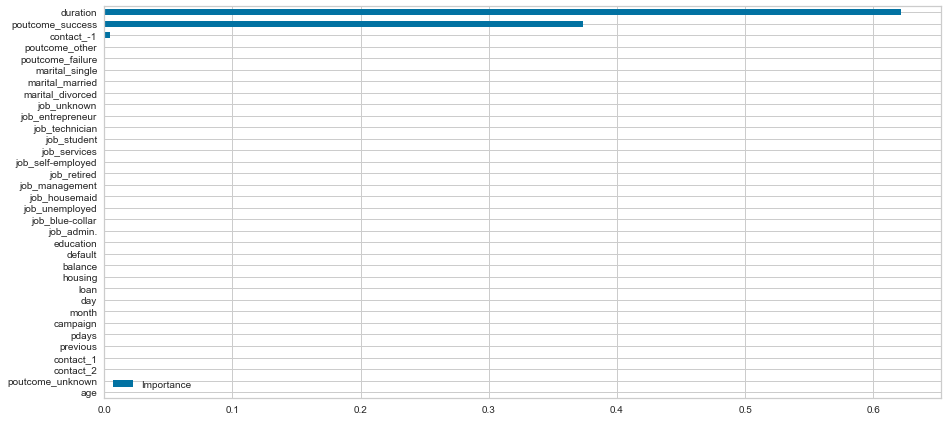

In [41]:
#############################################################################################################
# Features/Variables most important to the Decision Tree Models                         #####################
#############################################################################################################

feature_importances = pd.DataFrame(dTreeR.feature_importances_, index = X.columns, 
                                   columns=['Importance']).sort_values('Importance', ascending = True)
feature_importances.sort_values(by = 'Importance', ascending = True).plot(kind = 'barh', figsize = (15, 7.2))

### Insights: 
- As indicated in the correlation matrix and in the Feature Importances, duration of the call is the most important feature
- Poutcome Success is the second most important.


### Construct the Confusion matrix and depict the Classification Report

<AxesSubplot:>

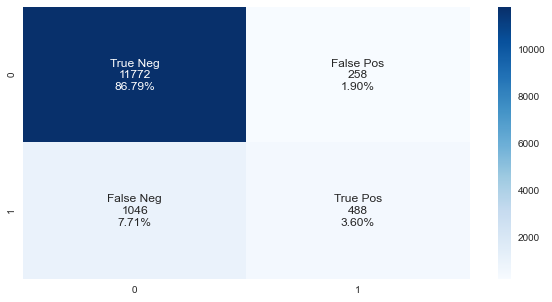

In [42]:

cf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize = (10,5))

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in 
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12030
           1       0.65      0.32      0.43      1534

    accuracy                           0.90     13564
   macro avg       0.79      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564



In [45]:
print('Model Predicted Correctly: {0:.3f} % of the time'.format(model_score * 100))

Model Predicted Correctly: 90.386 % of the time


0.8184231403238968
0.6483380856853954


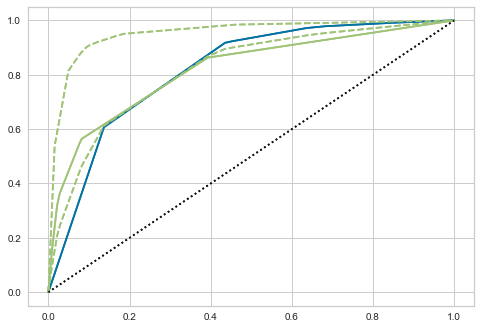

In [46]:
#roc = ROCAUC(DecisionTreeClassifier(criterion = "gini", max_depth=3))
from sklearn.metrics import roc_curve, roc_auc_score
roc = ROCAUC(dTreeR)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc
print(roc.score(X_test, y_test))
rauc = roc_auc_score(y_test, predictions)
print (rauc)

In [49]:
#################################################################################
# Function to Calculate AUC, Recall, f1-Score and Precision and Accuracy     ####
#################################################################################

def MacroAvgMetrics (y_test, predictions, dType):
    
    resultsDf = pd.DataFrame({'Method':[dType], 'accuracy': model_score, 'auc': roc_auc_score(y_test, predictions),
                         'Recall': metrics.recall_score(y_test, predictions, pos_label=1, average='binary'),
                         'f1-Score': metrics.f1_score(y_test, predictions, average='binary'),
                         'Precision': metrics.precision_score(y_test, predictions, average='binary')})
    resultsDf = resultsDf[['Method', 'accuracy', 'auc', 'Recall','f1-Score','Precision']]
        
#    print(resultsDf)
    return resultsDf


In [50]:
#################################################################################
# Call Function ResMetrics to populate key metrics for the Decision Tree Model
#################################################################################
ResMetrics = MacroAvgMetrics(y_test, predictions,'Decision Tree')
ResMetrics

Method  accuracy       auc    Recall  f1-Score  Precision
0  Decision Tree  0.903863  0.648338  0.318123   0.42807   0.654155

In [368]:
#def ModelScore(TP, TN, FP, FN):
#
#   Accuracy    = (TP + TN) / (TP+TN+FP+FN)
#   Precision   = TP / (TP + FP)
#   Recall      = TP / (TP + FN)
#   Specificity = TN / (TN + FP)
#   F1          = (2 * (TP / (TP + FP)) * (TP / (TP + FN))) / ((TP / (TP + FP)) + (TP / (TP + FN)))

#   print("Model Classification Performance from the Confusion Matrix Values")
#   print('')
#   print('\033[1m Accuracy:\033[0m Measure the ratio of correct predictions to total predictions made: {0:.2f} %'.format(Accuracy*100))
#   print('\033[1m Precision: \033[0m Measure of correctness achieved in prediction: {0:.2f} %'.format(Precision*100))
#   print('\033[1m Recall: \033[0m Measure of completeness, actual true observations that are predicted correctly: {0:.2f} %'.format(Recall*100))
#   print('\033[1m Specificity:\033[0m Measure of how many observations of false category predicted correctly: {0:.2f} %'.format(Specificity*100)) 
#   print('\033[1m F1-Score:\033[0m F1-score is defined as harmonic mean of precision and recall: {0:.2f} %'.format(F1*100))
#   return
   

## Ensemble - Bagging

In [51]:
################################################################################
# Note that for Bagging, Based Estimator = dTree is used. 
# It indicates that complex models with no depth restriction will be used.
################################################################################


bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=7)

bgcl = bgcl.fit(X_train, y_train)

predictions = bgcl.predict(X_test)
model_score = (accuracy_score(y_test, predictions))
print(model_score)

0.9059274550280153


0.9059274550280153


<AxesSubplot:>

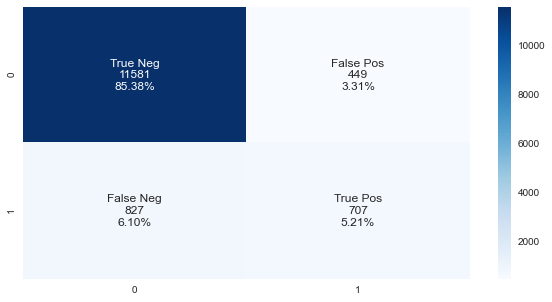

In [52]:
predictions = bgcl.predict(X_test)
print(bgcl.score(X_test, y_test))

cf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize = (10,5))

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in 
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [53]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     12030
           1       0.61      0.46      0.53      1534

    accuracy                           0.91     13564
   macro avg       0.77      0.71      0.74     13564
weighted avg       0.90      0.91      0.90     13564



In [54]:
print('Model Predicted Correctly: {0:.3f} % of the time'.format(model_score * 100))

Model Predicted Correctly: 90.593 % of the time


0.9213171710012236
0.7117816063925367


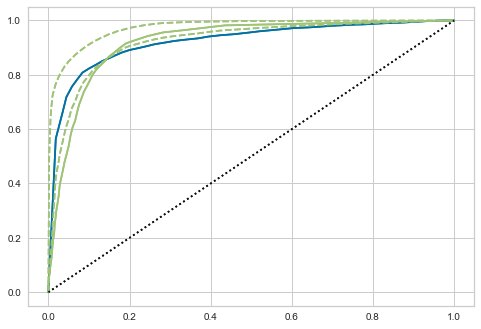

In [55]:
roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=17))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc
print(roc.score(X_test, y_test))
rauc = roc_auc_score(y_test, predictions)
print (rauc)

In [56]:
#################################################################################
# Call Function ResMetrics to populate key metrics for the Bagging Model
#################################################################################

ResMetricsT = MacroAvgMetrics(y_test, predictions,'Bagging')
ResMetrics = pd.concat([ResMetrics, ResMetricsT])
ResMetrics

Method  accuracy       auc    Recall  f1-Score  Precision
0  Decision Tree  0.903863  0.648338  0.318123  0.428070   0.654155
0        Bagging  0.905927  0.711782  0.460887  0.525651   0.611592

## Ensemble - AdaBoosting

In [58]:
#############################################################
# AdaBoosting uses simple models. The subsequent model build on error of the previous model and so on.
# from sklearn.ensemble import AdaBoostClassifier
#############################################################
abcl = AdaBoostClassifier(n_estimators=50, random_state=7)
abcl = abcl.fit(X_train, y_train)

predictions = abcl.predict(X_test)
model_score = (accuracy_score(y_test, predictions))
print(model_score)

0.9021675022117369


<AxesSubplot:>

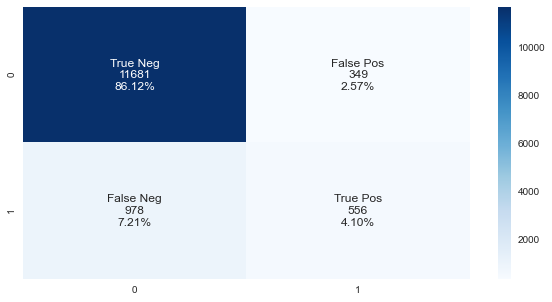

In [59]:
#predictions = abcl.predict(X_test)

cf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize = (10,5))

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in 
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12030
           1       0.61      0.36      0.46      1534

    accuracy                           0.90     13564
   macro avg       0.77      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [61]:
print('Model Predicted Correctly: {0:.3f} % of the time'.format(model_score * 100))

Model Predicted Correctly: 90.217 % of the time


0.8933315751101233
0.6667201509481403


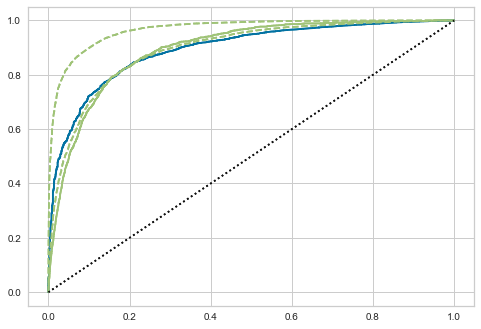

In [62]:
roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=17))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc
print(roc.score(X_test, y_test))
rauc = roc_auc_score(y_test, predictions)
print (rauc)

In [63]:
#################################################################################
# Call Function ResMetrics to populate key metrics for AdaBoosting Model
#################################################################################
ResMetricsT = MacroAvgMetrics(y_test, predictions,'AdaBoosting')
ResMetrics = pd.concat([ResMetrics, ResMetricsT])
ResMetrics

Method  accuracy       auc    Recall  f1-Score  Precision
0  Decision Tree  0.903863  0.648338  0.318123  0.428070   0.654155
0        Bagging  0.905927  0.711782  0.460887  0.525651   0.611592
0    AdaBoosting  0.902168  0.666720  0.362451  0.455925   0.614365

## Ensemble  - GradientBoost

In [64]:
#from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=7)
gbcl = gbcl.fit(X_train, y_train)

predictions = gbcl.predict(X_test)
model_score = (accuracy_score(y_test, predictions))
print(model_score)

0.9072544971984665


<AxesSubplot:>

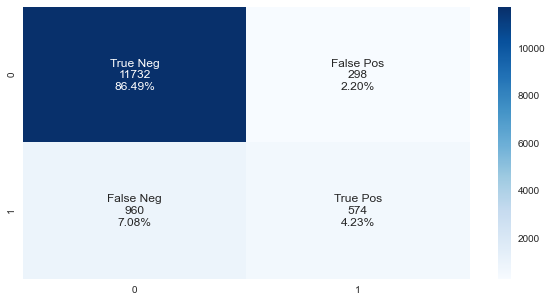

In [65]:
predictions = gbcl.predict(X_test)

cf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize = (10,5))

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in 
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12030
           1       0.66      0.37      0.48      1534

    accuracy                           0.91     13564
   macro avg       0.79      0.67      0.71     13564
weighted avg       0.89      0.91      0.90     13564



In [67]:
print('Model Predicted Correctly: {0:.3f} % of the time'.format(model_score * 100))

Model Predicted Correctly: 90.725 % of the time


0.9139887468635748
0.6747068660378606


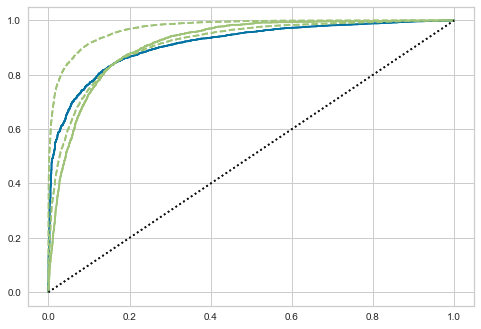

In [68]:
roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=17))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc
print(roc.score(X_test, y_test))
rauc = roc_auc_score(y_test, predictions)
print (rauc)

In [69]:
#################################################################################
# Call Function ResMetrics to populate key metrics for the Gradient Boost Model
#################################################################################
ResMetricsT = MacroAvgMetrics(y_test, predictions,'GradientBoost')
ResMetrics = pd.concat([ResMetrics, ResMetricsT])
ResMetrics

Method  accuracy       auc    Recall  f1-Score  Precision
0  Decision Tree  0.903863  0.648338  0.318123  0.428070   0.654155
0        Bagging  0.905927  0.711782  0.460887  0.525651   0.611592
0    AdaBoosting  0.902168  0.666720  0.362451  0.455925   0.614365
0  GradientBoost  0.907254  0.674707  0.374185  0.477140   0.658257

## Ensemble RandomForest Classifier

In [70]:
#from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=7,max_features=10)
rfcl = rfcl.fit(X_train, y_train)

predictions = rfcl.predict(X_test)
model_score = (accuracy_score(y_test, predictions))
print(model_score)

0.9074019463285167


<AxesSubplot:>

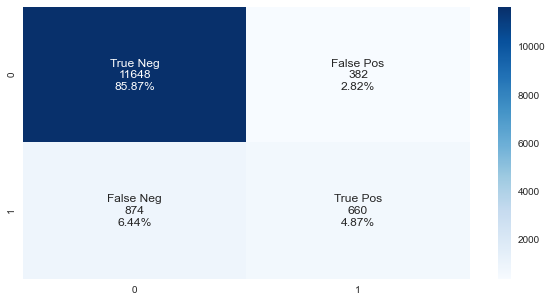

In [71]:

cf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize = (10,5))

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in 
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [72]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12030
           1       0.63      0.43      0.51      1534

    accuracy                           0.91     13564
   macro avg       0.78      0.70      0.73     13564
weighted avg       0.90      0.91      0.90     13564



In [73]:
print('Model Predicted Correctly: {0:.3f} % of the time'.format(model_score * 100))

Model Predicted Correctly: 90.740 % of the time


0.9214291384749772
0.6992468849605669


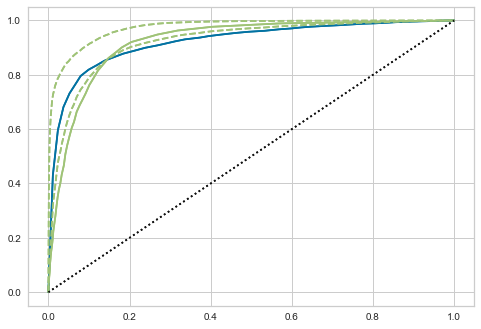

In [74]:
roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc
print(roc.score(X_test, y_test))
rauc = roc_auc_score(y_test, predictions)
print (rauc)

In [75]:
#################################################################################
# Call Function ResMetrics to populate key metrics for the Random Forest Model
#################################################################################

ResMetricsT = MacroAvgMetrics(y_test, predictions,'Random Forest')
ResMetrics = pd.concat([ResMetrics, ResMetricsT])
ResMetrics

Method  accuracy       auc    Recall  f1-Score  Precision
0  Decision Tree  0.903863  0.648338  0.318123  0.428070   0.654155
0        Bagging  0.905927  0.711782  0.460887  0.525651   0.611592
0    AdaBoosting  0.902168  0.666720  0.362451  0.455925   0.614365
0  GradientBoost  0.907254  0.674707  0.374185  0.477140   0.658257
0  Random Forest  0.907402  0.699247  0.430248  0.512422   0.633397

## Finding/Conclusion:
### Methodology
- The aim of this analysis is to determine if a customer will subscribe (yes/no) to term of deposit.
- This analysis comprehended the application of five different types of modeling methods. 
- For each model, confusion matrix, roc score and key metrics to assess each model was built and deployed.
- Each model was stacked against each other depicting their key measurement of performance.


### Key Models Performance Measurements:
**Accuracy:** Measure the ratio of correct predictions to total predictions made. Hence, Model overall accuracy.<br>
**Recall:** Out of the positive classes, how much the model predicted correctly. Hence, when the outcome is actually the positive one, how often does the model predicted it correctly? It should be high as possible.<br>
**Precision:** Out of all the classes, how much it predicted correctly. When it predicts the positive result, how often is it correct? It should be high as possible.<br>
**F1-score:** It is defined as harmonic mean of precision and recall. <br>
**AUC** - The area under curve (AUC) is another measure for classification models and is based on ROC. It is the measure of accuracy judged by the area under the curve for ROC. It should be high as possible.<br>



### Model Selection

In [76]:
ResMetrics

Method  accuracy       auc    Recall  f1-Score  Precision
0  Decision Tree  0.903863  0.648338  0.318123  0.428070   0.654155
0        Bagging  0.905927  0.711782  0.460887  0.525651   0.611592
0    AdaBoosting  0.902168  0.666720  0.362451  0.455925   0.614365
0  GradientBoost  0.907254  0.674707  0.374185  0.477140   0.658257
0  Random Forest  0.907402  0.699247  0.430248  0.512422   0.633397

Although one may argue that all these five models above are very similar in terms of performance, I recommend the selection of **Bagging (Bootstrap)**.<br>
The table above stack and compare every model. The Bagging techniques seems to be a better fit for the Bank. The main reason for selecting Bagging techniques is because, for this particular problem, achieving a high recall is more important than getting a high precision. Recall also gives a measure of how accurately our model is able to identify the relevant data (in this case increase the subscription to the term deposit). We refer to it as Sensitivity or True Positive Rate.<br> 

Hence, we want to detect as many potential customers as possible. If the problem in hand was classifying whether a bank customer is a loan defaulter or not, it would be desirable to have a high precision since the bank wouldn’t want to lose customers who were denied a loan based on the model’s prediction that they would be defaulters.<br>
<br>
Additional reasons for **Bagging** selection:<br>
1. _Precision_ is the ratio between the True Positives and all the Positives. For our Banking statement, that would be the measure of customers that we correctly identify having a term deposit out of all the customers actually having it. Gradient Boost, for example, has the highest rate of precision. However, Bagging has a higher Recall and the difference of precision between Gradient Boost and Bagging is very marginal.  <br>
2. The **Bagging** _Recall_ rate is the best out of these 5 models. The recall is the measure of our model correctly identifying True Positives. Thus, for all the customers who actually subscribed to a term deposit, recall tells us how many we correctly identified as having done exactly that. <br>
3. The _Area Under the Curve_ (AUC) ranges from 0 to 1. We should aim for a high value of AUC. Models with a high AUC are called as models with good skill. **Bagging** has the highest AUC.<br>
4. The F1-Score is defined as harmonic mean of precision and recall. F1-Score eliminates the need of balancing precision and recall, we can just aim for a good F1-score and that would be indicative of a good Precision and a good Recall value as well. Bagging has the highest F1-Score.<br>


### Key data points:
1. The two most important attributes for determining if the customer subscribed to a term deposit are call duration and poutcome succesful.
2. Customers with education level of Secondary and Tertiaty are more prone to subscribe to a term deposit.
3. Customers with no personal loans are more inclined to subscribe to a term deposit.
4. Call duration values for 25th, 50th and 75th percentile are 103, 180 and 319 seconds respectively. 
5. Campaign values for 25th, 50th and 75th percentile are 1, 2 and 3 respectively. 
6. Although months of the year is not relevant to the model, it is puzzling that campaing calls occured primary on May (during summer vacation).


### Recommendations:
1. Spread the campaign calls across the year or don't make the bulk of the call on May when many European customers are on Summer vacation.
2. In order to turn non-subscribed customers into subscribed term deposit customers, focus on customers with higher education and customers that don't have already a personal loan.
3. Call duration has a strong correlation with customers that subscribed to a term deposit. Hence, spending more time with the customers on the call can translate into a successful sale.
4. To derive continued benefits from these machine learning models, we must iterate on the models to address model drift, as well as to incorporate new insights and additional data gained during the campaign process. Having a tight feedback loop will ensure that the machine learning models continues to provide ROI for a long time.
4. Finally, as more customers are converted to subscribed term deposit, it is important to keep retraining the models.